# Imports

In [29]:
import numpy    as np
import pandas   as pd

from sklearn    import cluster  as ct
from sklearn    import metrics  as mt
from matplotlib import pyplot   as plt
from sklearn.decomposition import PCA

# Load Dataset

In [30]:
#Lendo arquivo CSV
x = pd.read_csv('../../dataset/cluster/X_dataset.csv')

# Model Training - Kmeans

In [31]:
n_clusters = np.arange(2,15)
ss_list = []

for c in n_clusters:
    #define
    model = ct.KMeans(n_clusters=c,
                      random_state=0)

    #fit
    labels = model.fit_predict(x)

    #performance
    ss_avg = mt.silhouette_score(x,labels)
    ss_list.append(ss_avg)
    print(f'For n_clusters = {c} - The average SS: {ss_avg:.3f}')

For n_clusters = 2 - The average SS: 0.213
For n_clusters = 3 - The average SS: 0.232
For n_clusters = 4 - The average SS: 0.206
For n_clusters = 5 - The average SS: 0.208
For n_clusters = 6 - The average SS: 0.190
For n_clusters = 7 - The average SS: 0.191
For n_clusters = 8 - The average SS: 0.163
For n_clusters = 9 - The average SS: 0.176
For n_clusters = 10 - The average SS: 0.176
For n_clusters = 11 - The average SS: 0.178
For n_clusters = 12 - The average SS: 0.175
For n_clusters = 13 - The average SS: 0.168
For n_clusters = 14 - The average SS: 0.158


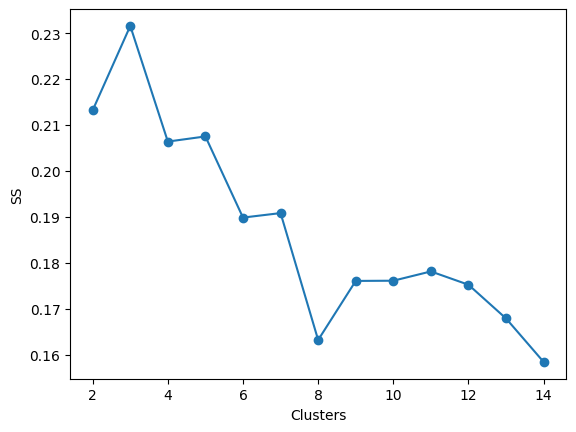

In [32]:
#Plot Elbow Method
plt.plot(n_clusters,ss_list,marker='o');
plt.xlabel('Clusters');
plt.ylabel('SS');

# Produção

In [33]:
max_ss = max(ss_list)
k_max = ss_list.index(max_ss)

#define
model = ct.KMeans(n_clusters=n_clusters[k_max],
                  random_state=0)

#fit
labels = model.fit_predict(x)

#performance
ss_avg = mt.silhouette_score(x,labels)

print(
f'''Silhouette Score: {ss_avg:.3f}
Clusters: {n_clusters[k_max]}''')

Silhouette Score: 0.232
Clusters: 3


/home/leprado06/.pyenv/versions/ensaio_ML/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'K-Means')

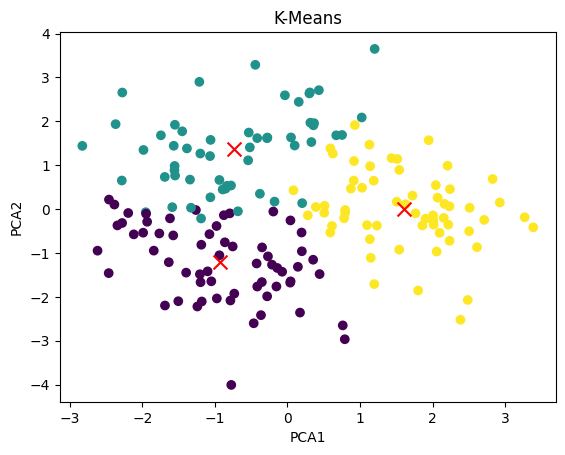

In [34]:
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(x)
reduced_X = pd.DataFrame(data=reduced_X, columns=["PC1", "PC2"])
reduced_X.head()

# reduced centers
centers = pca.transform(model.cluster_centers_)
centers

# Scatter Plot
plt.scatter(reduced_X["PC1"], reduced_X["PC2"], c=model.labels_)
plt.scatter(centers[:, 0], centers[:, 1], marker="x", s=100, c="red")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("K-Means")

# Save Results

In [35]:
train_metrics = {
    "Algorithm": "KMeans",
    "N Clusters": n_clusters[k_max],
    "Average Silhouette Score": np.round(ss_avg, 3),
}

pd.DataFrame(train_metrics, index=[0]).to_csv("./clustering_metrics.csv", mode="a", header=False)